In [2]:
!pip install agentpy


# **Working Solution**

In [11]:
import joblib
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Save the trained model to a file
model_filename = 'iris_model.pkl'
joblib.dump(classifier, model_filename)


['iris_model.pkl']

In [12]:
import agentpy as ap
import joblib
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

class Informer(ap.Agent):
    def setup(self):
        iris = load_iris()
        X = iris.data
        y = iris.target

        # Store target names for decoding
        self.model.target_names = iris.target_names

        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Store the datasets in the model
        self.model.X_test = X_test
        self.model.y_test = y_test

    def step(self):
        # Send the test dataset to the Classifier
        self.model.classifier_agent.receive_data(self.model.X_test)

class Classifier(ap.Agent):
    def setup(self):
        # Load the trained model
        model_filename = 'iris_model.pkl'
        self.classifier = joblib.load(model_filename)

    def receive_data(self, X_test):
        # Predict using the loaded model
        y_pred = self.classifier.predict(X_test)

        # Decode predictions to class names
        decoded_predictions = [self.model.target_names[pred] for pred in y_pred]

        # Send predictions to the Evaluator
        self.model.evaluator_agent.receive_predictions(decoded_predictions)

class Evaluator(ap.Agent):
    def setup(self):
        self.y_pred = None

    def receive_predictions(self, y_pred):
        # Store the predictions in the model
        self.y_pred = y_pred

    def print_results(self):
        # Print the predictions
        print("Predictions:", self.y_pred)

class IrisModel(ap.Model):
    def setup(self):
        # Create agents
        self.informer_agent = Informer(self)
        self.classifier_agent = Classifier(self)
        self.evaluator_agent = Evaluator(self)

        # Add agents to a list
        self.agents = ap.AgentList(self, [self.informer_agent, self.classifier_agent, self.evaluator_agent])

        # Setup the agents
        self.informer_agent.setup()
        self.classifier_agent.setup()
        self.evaluator_agent.setup()

    def step(self):
        self.informer_agent.step()

    def end(self):
        # Print the results
        self.evaluator_agent.print_results()

# Define parameters
parameters = {
    'steps': 1,
    'seed': 42,
}

# Run the model
iris_model = IrisModel(parameters)
results = iris_model.run()


Completed: 1 stepsPredictions: ['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica', 'setosa', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'setosa', 'setosa']

Run time: 0:00:00.169141
Simulation finished


# **Drafts**

In [ ]:
import agentpy as ap

class HelloWorldAgent(ap.Agent):

    def setup(self):
        # Initialize agent attributes
        self.position = self.random.choice(self.model.grid.positions)

    def move(self):
        # Move agent to a random neighboring position
        neighbors = self.model.grid.get_neighbors(self.position, moore=True)
        if neighbors:
            new_position = self.random.choice(neighbors)
            self.model.grid.move_agent(self, new_position)

    def greet(self):
        # Get nearby agents and greet them
        nearby_agents = self.model.grid.get_neighbors(self.position, moore=False)
        for agent in nearby_agents:
            if agent != self:
                self.log('Greeted ' + str(agent.unique_id))


In [ ]:
class HelloWorldModel(ap.Model):

    def setup(self):
        # Create grid environment
        self.grid = ap.Grid(self, (10, 10), track_empty=True)

        # Create agents
        self.agents = ap.AgentList(self, self.p.agents, HelloWorldAgent)

    def step(self):
        # Move agents
        for agent in self.agents:
            agent.move()

        # Greet nearby agents
        for agent in self.agents:
            agent.greet()


In [ ]:
parameters = {
    'agents': 5,
    'steps': 10
}

model = HelloWorldModel(parameters)
results = model.run()


AttributeError: HelloWorldAgent (Obj 2) has no attribute 'unique_id'.

In [ ]:
import agentpy as ap

class HelloWorldAgent(ap.Agent):

    def setup(self):
        # Initialize agent attributes
        self.position = self.model.grid.positions[self.unique_id]

    def move(self):
        # Move agent to a random neighboring position
        neighbors = self.model.grid.get_neighbors(self.position, moore=True)
        if neighbors:
            new_position = self.random.choice(neighbors)
            self.model.grid.move_agent(self, new_position)

    def greet(self):
        # Get nearby agents and greet them
        nearby_agents = self.model.grid.get_neighbors(self.position, moore=False)
        for agent in nearby_agents:
            if agent != self:
                self.log('Greeted ' + str(agent.unique_id))


-----

In [ ]:
import agentpy as ap

In [ ]:
class MyAgent(ap.Agent):

    def setup(self):
        # Initialize an attribute with a parameter
        self.my_attribute = self.p.my_parameter

    def agent_method(self):
        # Define custom actions here
        pass

In [ ]:
class MyModel(ap.Model):

    def setup(self):
        """ Initiate a list of new agents. """
        self.agents = ap.AgentList(self, self.p.agents, MyAgent)

    def step(self):
        """ Call a method for every agent. """
        self.agents.agent_method()

    def update(self):
        """ Record a dynamic variable. """
        self.agents.record('my_attribute')

    def end(self):
        """ Repord an evaluation measure. """
        self.report('my_measure', 1)

In [ ]:
parameters = {
    'my_parameter':42,
    'agents':10,
    'steps':10
}

model = MyModel(parameters)
results = model.run()

Completed: 10 steps
Run time: 0:00:00.013984
Simulation finished


In [ ]:
results.variables.MyModel.head()

AttributeError: MyModel

------

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
class InformerAgent(ap.Agent):

    def setup(self):
        # Load the dataset
        self.dataset = load_iris()  # Assuming the dataset is already loaded

    def get_data(self):
        return self.dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier

class ClassifierAgent(ap.Agent):

    def setup(self):
        # Get dataset from Informer agent
        self.dataset = self.model.informer.get_data()

        # Train classifier
        self.model = RandomForestClassifier()
        self.model.fit(self.dataset['data'], self.dataset['target'])


In [ ]:
from sklearn.metrics import accuracy_score

class EvaluatorAgent(ap.Agent):

    def setup(self):
        # Get dataset from Informer agent
        self.dataset = self.model.informer.get_data()

    def evaluate(self, classifier):
        # Evaluate classifier's performance
        predictions = classifier.model.predict(self.dataset['data'])
        accuracy = accuracy_score(self.dataset['target'], predictions)
        return accuracy


In [ ]:
class IrisClassifierModel(ap.Model):

    def setup(self):
        # Create Informer agent
        self.informer = InformerAgent(self)

        # Create Classifier agents
        self.classifiers = ap.AgentList(self, self.p.classifiers, ClassifierAgent)

        # Create Evaluator agent
        self.evaluator = EvaluatorAgent(self)

    def step(self):
        # Evaluate each classifier's performance
        for classifier in self.classifiers:
            accuracy = self.evaluator.evaluate(classifier)
            self.record('Classifier Accuracy', accuracy)


In [ ]:
parameters = {
    'classifiers': 1,  # Number of classifier agents
    'steps' : 100
}

model = IrisClassifierModel(parameters)
results = model.run()


Completed: 100 steps
Run time: 0:00:02.550944
Simulation finished


---

In [ ]:
!git clone https://github.com/grei-ufc/pade
!cd pade
!python setup.py install

Cloning into 'pade'...
remote: Enumerating objects: 2391, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 2391 (delta 71), reused 102 (delta 51), pack-reused 2249
Receiving objects: 100% (2391/2391), 3.02 MiB | 19.56 MiB/s, done.
Resolving deltas: 100% (1484/1484), done.
python3: can't open file '/content/setup.py': [Errno 2] No such file or directory


In [ ]:
from pade.misc.utility import display_message, start_loop
from pade.core.agent import Agent
from pade.acl.aid import AID
from sys import argv

class AgenteHelloWorld(Agent):
    def __init__(self, aid):
        super(AgenteHelloWorld, self).__init__(aid=aid)
        display_message(self.aid.localname, 'Hello World!')


if __name__ == '__main__':

    agents_per_process = 3
    c = 0
    agents = list()
    for i in range(agents_per_process):
        port = int(argv[1]) + c
        agent_name = 'agente_hello_{}@localhost:{}'.format(port, port)
        agente_hello = AgenteHelloWorld(AID(name=agent_name))
        agents.append(agente_hello)
        c += 1000

    start_loop(agents)

ModuleNotFoundError: No module named 'pade.misc'

In [ ]:
!pip install agency

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: docstring-parser
    Found existing installation: docstring_parser 0.16
    Uninstalling docstring_parser-0.16:
      Successfully uninstalled docstring_parser-0.16


In [ ]:
import os
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#from agency import LocalSpace, Agent, action
from agency.spaces.local_space import LocalSpace
from agency.agent import Agent, action

# Define Agents
class DatasetAgent(Agent):
    """Agent to hold the dataset"""

    def setup(self):
        self.dataset = load_iris()

class ClassifierAgent(Agent):
    """Agent to train the classifier"""

    def setup(self):
        self.dataset = self.space.get_agent("Dataset")
        self.model = RandomForestClassifier()
        self.model.fit(self.dataset.data, self.dataset.target)

class EvaluatorAgent(Agent):
    """Agent to evaluate classifier performance"""

    def setup(self):
        self.dataset = self.space.get_agent("Dataset")
        self.classifier = self.space.get_agent("Classifier")

    def evaluate(self):
        predictions = self.classifier.model.predict(self.dataset.data)
        accuracy = accuracy_score(self.dataset.target, predictions)
        return accuracy

class UserInterfaceAgent(Agent):
    """Agent to interact with the user"""

    @action
    def classify(self, data):
        classifier = self.space.get_agent("Classifier")
        prediction = classifier.model.predict([data])[0]
        return prediction

# Create the space instance
space = LocalSpace()

# Add agents to the space
space.add(DatasetAgent, "Dataset")
space.add(ClassifierAgent, "Classifier")
space.add(EvaluatorAgent, "Evaluator")
space.add(UserInterfaceAgent, "UserInterface")

# Run the simulation
results = space.run()


BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

In [ ]:
!pip install py4jason

ERROR: Could not find a version that satisfies the requirement py4jason (from versions: none)
ERROR: No matching distribution found for py4jason


In [ ]:
from py4j.java_gateway import JavaGateway

# Connect to the Java gateway
gateway = JavaGateway()

# Get a reference to a JaCaMo agent
agent = gateway.jvm.jacamo.project.MyAgent()

# Send a message to the agent
response = agent.receiveMessage("Hello from Python!")

# Print the response
print(response)


In [ ]:
from py4j.java_gateway import JavaGateway

# Connect to the Java gateway
gateway = JavaGateway()

# Get a reference to a JaCaMo agent
agent = gateway.jvm.jacamo.project.MyAgent()

# Send a message to the agent
response = agent.receiveMessage("Hello from Python!")

# Print the response
print(response)


ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:25333)
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 982, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1132, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:25333)

In [ ]:
from py4jason import Agent, Jason

# Create a Jason agent instance
jason_agent = Agent("JasonAgent")

# Create a Jason platform instance
jason_platform = Jason()

# Add the Jason agent to the platform
jason_platform.add_agent(jason_agent)

# Define a Python function to interact with the Jason agent
def send_message_to_agent(message):
    response = jason_platform.send_message(jason_agent.name, message)
    return response

# Send a message to the Jason agent and receive the response
message = "Hello, Jason!"
response = send_message_to_agent(message)
print("Response from Jason agent:", response)


ModuleNotFoundError: No module named 'py4jason'

In [ ]:
!pip install mesa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

class NewsArticle(Agent):
    def __init__(self, unique_id, model, text):
        super().__init__(unique_id, model)
        self.text = text
        self.classification = None

    def step(self):
        # Extract features from text
        features = self.model.vectorizer.transform([self.text])
        # Classify using the trained model
        prediction = self.model.classifier.predict(features)[0]
        self.classification = prediction

class FakeNewsModel(Model):
    def __init__(self, articles, classifier):
        self.num_agents = len(articles)
        self.schedule = RandomActivation(self)
        self.vectorizer = TfidfVectorizer(max_features=1000)
        self.classifier = classifier

        # Create agents
        for i, article in enumerate(articles):
            agent = NewsArticle(i, self, article)
            self.schedule.add(agent)

    def step(self):
        self.schedule.step()

if __name__ == "__main__":
    # Example dataset (replace with your own)
    fake_articles = ["This is fake news about aliens.",
                     "Scientists confirm alien presence on Earth!",
                     "Aliens invade New York City!"]

    real_articles = ["New study finds no evidence of alien life.",
                     "NASA discovers new exoplanet.",
                     "Interview with leading astrophysicist on the search for extraterrestrial life."]

    all_articles = fake_articles + real_articles
    labels = [1] * len(fake_articles) + [0] * len(real_articles)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(all_articles, labels, test_size=0.2, random_state=42)

    # Train classifier
    vectorizer = TfidfVectorizer(max_features=1000)
    X_train_vec = vectorizer.fit_transform(X_train)

    classifier = SVC(kernel='linear')
    classifier.fit(X_train_vec, y_train)

    # Initialize model with trained classifier
    model = FakeNewsModel(X_test, classifier)

    # Run model
    for _ in range(10):
        model.step()

    # Evaluation
    correct_labels = [agent.classification for agent in model.schedule.agents]
    accuracy = accuracy_score(y_test, correct_labels)
    print("Accuracy:", accuracy)


<ipython-input-50-d86a8be9c7d6>:14: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


NotFittedError: The TF-IDF vectorizer is not fitted

In [ ]:
%pip install --quiet mesa

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

joblib.dump(clf, 'iris_classifier.joblib')

loaded_model = joblib.load('iris_classifier.joblib')

# For example, predict the first two samples from the test set
predictions = loaded_model.predict(X_test[:2])
print(predictions)

[1 0]


In [ ]:
from mesa import Agent, Model
from mesa.time import RandomActivation
import random
import joblib
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

class Informer(Agent):
    def __init__(self, unique_id, model, classifier_agent):
        super().__init__(unique_id, model)
        self.iris = load_iris()
        self.X_test = self.split_data()
        self.classifier_agent = classifier_agent

    def split_data(self):
        X = self.iris.data
        y = self.iris.target
        _, X_test, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)
        return X_test

    def step(self):
        random_sample = random.choice(self.X_test)
        self.classifier_agent.predict_sample(random_sample)

class Classifier(Agent):
    def __init__(self, unique_id, model, evaluator_agent):
        super().__init__(unique_id, model)
        self.loaded_model = joblib.load('iris_classifier.joblib')
        self.evaluator_agent = evaluator_agent

    def predict_sample(self, sample):
        prediction = self.loaded_model.predict([sample])[0]
        self.evaluator_agent.evaluate(prediction)

class Evaluator(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)

    def evaluate(self, prediction):
        if prediction == 0:
            print("Iris setosa")
        elif prediction == 1:
            print("Iris versicolor")
        else:
            print("Iris virginica")

class IrisModel(Model):
    def __init__(self, num_informers, num_classifiers, num_evaluators):
        self.num_informers = num_informers
        self.num_classifiers = num_classifiers
        self.num_evaluators = num_evaluators
        self.schedule = RandomActivation(self)

        # Create agents
        evaluator_agent = Evaluator(0, self)
        self.schedule.add(evaluator_agent)

        classifier_agent = Classifier(1, self, evaluator_agent)
        self.schedule.add(classifier_agent)

        for i in range(self.num_informers):
            informer = Informer(i, self, classifier_agent)
            self.schedule.add(informer)

    def step(self):
        self.schedule.step()

# Create and run the model
model = IrisModel(num_informers=1, num_classifiers=1, num_evaluators=1)
for i in range(10):  # Run for 10 steps
    model.step()

<ipython-input-52-17db1e759acd>:37: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


Iris virginica
Iris versicolor
Iris setosa
Iris setosa
Iris virginica
Iris versicolor
Iris versicolor
Iris virginica
Iris virginica
Iris versicolor


In [ ]:
import agentpy as ap
import numpy as np

# Visualization
import seaborn as sns

In [ ]:
class WealthAgent(ap.Agent):

    """ An agent with wealth """

    def setup(self):

        self.wealth = 1

    def wealth_transfer(self):

        if self.wealth > 0:

            partner = self.model.agents.random()
            partner.wealth += 1
            self.wealth -= 1

In [ ]:
def gini(x):

    """ Calculate Gini Coefficient """
    # By Warren Weckesser https://stackoverflow.com/a/39513799

    x = np.array(x)
    mad = np.abs(np.subtract.outer(x, x)).mean()  # Mean absolute difference
    rmad = mad / np.mean(x)  # Relative mean absolute difference
    return 0.5 * rmad

In [ ]:
class WealthModel(ap.Model):

    """ A simple model of random wealth transfers """

    def setup(self):

        self.agents = ap.AgentList(self, self.p.agents, WealthAgent)

    def step(self):

        self.agents.wealth_transfer()

    def update(self):

        self.record('Gini Coefficient', gini(self.agents.wealth))

    def end(self):

        self.agents.record('wealth')

In [ ]:
parameters = {
    'agents': 100,
    'steps': 100,
    'seed': 42,
}

In [ ]:
model = WealthModel(parameters)
results = model.run()

Completed: 100 steps
Run time: 0:00:00.187943
Simulation finished


In [ ]:
results.variables.WealthModel.head()

,Gini Coefficient
t,
0,0.0000
1,0.5370
2,0.5690
3,0.5614
4,0.5794


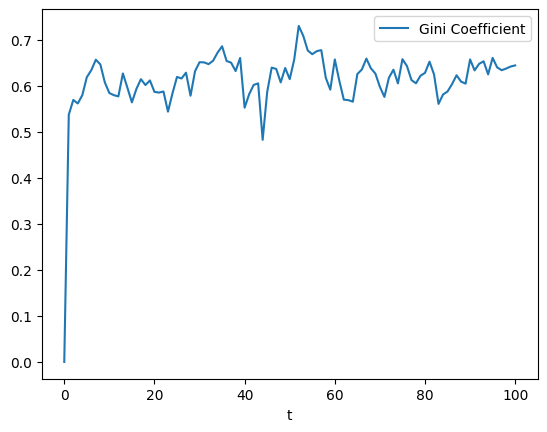

In [ ]:
data = results.variables.WealthModel
ax = data.plot()

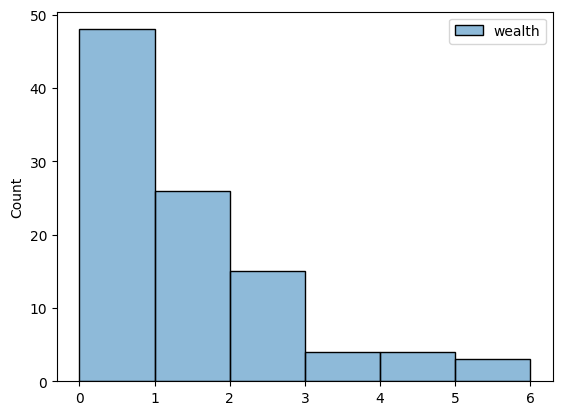

In [ ]:
sns.histplot(data=results.variables.WealthAgent, binwidth=1);

In [3]:
# Import necessary libraries
import agentpy as ap
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define a new type of Agent with the following methods
class WealthAgent(ap.Agent):
    """ An agent with wealth """
    def setup(self):
        self.wealth = 1

    def wealth_transfer(self):
        if self.wealth > 0:
            partner = self.model.agents.random()
            partner.wealth += 1
            self.wealth -= 1

# Method to calculate the Gini Coefficient
def gini(x):
    x = np.array(x)
    mad = np.abs(np.subtract.outer(x, x)).mean()
    rmad = mad / np.mean(x)
    return 0.5 * rmad

# Define the Model with iris classifier
class WealthModelWithIris(ap.Model):
    """ A simple model of random wealth transfers with an iris classifier """
    def setup(self):
        self.agents = ap.AgentList(self, self.p.agents, WealthAgent)

        # Load iris dataset
        iris = load_iris()
        X = iris.data
        y = iris.target

        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a RandomForestClassifier
        self.classifier = RandomForestClassifier(random_state=42)
        self.classifier.fit(X_train, y_train)

        # Make predictions
        y_pred = self.classifier.predict(X_test)

        # Calculate accuracy
        self.accuracy = accuracy_score(y_test, y_pred)

    def step(self):
        self.agents.wealth_transfer()

    def update(self):
        self.record('Gini Coefficient', gini(self.agents.wealth))

    def end(self):
        self.agents.record('wealth')
        print("Accuracy of the RandomForestClassifier: {:.2f}%".format(self.accuracy * 100))

# Define parameters
parameters = {
    'agents': 1,
    'steps': 100,
    'seed': 42,
}

# Run the model
model_with_iris = WealthModelWithIris(parameters)
results = model_with_iris.run()


Completed: 100 stepsAccuracy of the RandomForestClassifier: 100.00%

Run time: 0:00:00.249187
Simulation finished


In [4]:
import joblib
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Save the trained model to a file
model_filename = 'iris_model.pkl'
joblib.dump(classifier, model_filename)


['iris_model.pkl']

In [6]:
import agentpy as ap
import joblib
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class Informer(ap.Agent):
    def setup(self):
        iris = load_iris()
        X = iris.data
        y = iris.target

        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Store the datasets in the model
        self.model.X_test = X_test
        self.model.y_test = y_test

        # Send the test dataset to the Classifier
        classifier = self.model.agents['Classifier']
        classifier.receive_data(X_test)

class Classifier(ap.Agent):
    def setup(self):
        # Load the trained model
        model_filename = 'iris_model.pkl'
        self.model = joblib.load(model_filename)

    def receive_data(self, X_test):
        # Predict using the loaded model
        y_pred = self.model.predict(X_test)

        # Send predictions to the Evaluator
        evaluator = self.model.agents['Evaluator']
        evaluator.receive_predictions(y_pred)

class Evaluator(ap.Agent):
    def receive_predictions(self, y_pred):
        # Store the predictions in the model
        self.model.y_pred = y_pred

    def print_results(self):
        # Print the predictions
        print("Predictions:", self.model.y_pred)

class IrisModel(ap.Model):
    def setup(self):
        # Create agents
        self.agents = ap.AgentList(self, ['Informer', 'Classifier', 'Evaluator'])

        # Setup the agents
        self.agents['Informer'].setup()
        self.agents['Classifier'].setup()
        self.agents['Evaluator'].setup()

    def step(self):
        pass

    def end(self):
        # Print the results
        evaluator = self.agents['Evaluator']
        evaluator.print_results()

# Define parameters
parameters = {
    'steps': 1,
    'seed': 42,
}

# Run the model
iris_model = IrisModel(parameters)
results = iris_model.run()


TypeError: list indices must be integers or slices, not str

In [7]:
import joblib
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Save the trained model to a file
model_filename = 'iris_model.pkl'
joblib.dump(classifier, model_filename)


['iris_model.pkl']

In [8]:
import agentpy as ap
import joblib
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class Informer(ap.Agent):
    def setup(self):
        iris = load_iris()
        X = iris.data
        y = iris.target

        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Store the datasets in the model
        self.model.X_test = X_test
        self.model.y_test = y_test

        # Send the test dataset to the Classifier
        self.model.classifier_agent.receive_data(X_test)

class Classifier(ap.Agent):
    def setup(self):
        # Load the trained model
        model_filename = 'iris_model.pkl'
        self.classifier = joblib.load(model_filename)

    def receive_data(self, X_test):
        # Predict using the loaded model
        y_pred = self.classifier.predict(X_test)

        # Send predictions to the Evaluator
        self.model.evaluator_agent.receive_predictions(y_pred)

class Evaluator(ap.Agent):
    def receive_predictions(self, y_pred):
        # Store the predictions in the model
        self.model.y_pred = y_pred

    def print_results(self):
        # Print the predictions
        print("Predictions:", self.model.y_pred)

class IrisModel(ap.Model):
    def setup(self):
        # Create agents
        self.informer_agent = Informer(self)
        self.classifier_agent = Classifier(self)
        self.evaluator_agent = Evaluator(self)

        # Setup the agents
        self.informer_agent.setup()
        self.classifier_agent.setup()
        self.evaluator_agent.setup()

    def step(self):
        pass

    def end(self):
        # Print the results
        self.evaluator_agent.print_results()

# Define parameters
parameters = {
    'steps': 1,
    'seed': 42,
}

# Run the model
iris_model = IrisModel(parameters)
results = iris_model.run()


AttributeError: IrisModel has no attribute 'classifier_agent'.

In [9]:
import joblib
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Save the trained model to a file
model_filename = 'iris_model.pkl'
joblib.dump(classifier, model_filename)


['iris_model.pkl']

In [10]:
import agentpy as ap
import joblib
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

class Informer(ap.Agent):
    def setup(self):
        iris = load_iris()
        X = iris.data
        y = iris.target

        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Store the datasets in the model
        self.model.X_test = X_test
        self.model.y_test = y_test

    def step(self):
        # Send the test dataset to the Classifier
        self.model.classifier_agent.receive_data(self.model.X_test)

class Classifier(ap.Agent):
    def setup(self):
        # Load the trained model
        model_filename = 'iris_model.pkl'
        self.classifier = joblib.load(model_filename)

    def receive_data(self, X_test):
        # Predict using the loaded model
        y_pred = self.classifier.predict(X_test)

        # Send predictions to the Evaluator
        self.model.evaluator_agent.receive_predictions(y_pred)

class Evaluator(ap.Agent):
    def setup(self):
        self.y_pred = None

    def receive_predictions(self, y_pred):
        # Store the predictions in the model
        self.y_pred = y_pred

    def print_results(self):
        # Print the predictions
        print("Predictions:", self.y_pred)

class IrisModel(ap.Model):
    def setup(self):
        # Create agents
        self.informer_agent = Informer(self)
        self.classifier_agent = Classifier(self)
        self.evaluator_agent = Evaluator(self)

        # Add agents to a list
        self.agents = ap.AgentList(self, [self.informer_agent, self.classifier_agent, self.evaluator_agent])

        # Setup the agents
        self.informer_agent.setup()
        self.classifier_agent.setup()
        self.evaluator_agent.setup()

    def step(self):
        self.informer_agent.step()

    def end(self):
        # Print the results
        self.evaluator_agent.print_results()

# Define parameters
parameters = {
    'steps': 1,
    'seed': 42,
}

# Run the model
iris_model = IrisModel(parameters)
results = iris_model.run()


Completed: 1 stepsPredictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]

Run time: 0:00:00.273223
Simulation finished
